# Spiral Dynamics Inspired Optimization
## Kenichi Tamura and Keiichiro Yasuda
### https://doi.org/10.20965/jaciii.2011.p1116

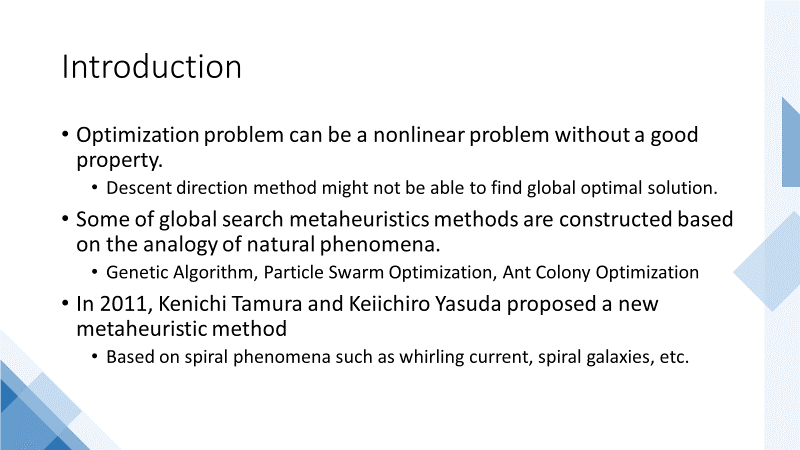

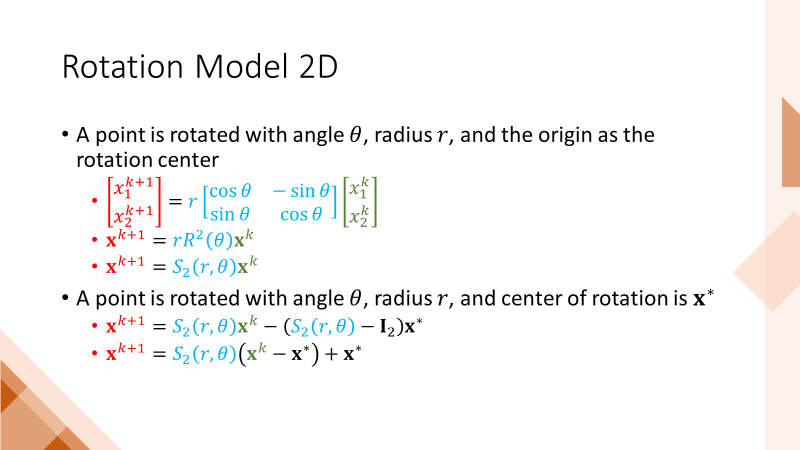

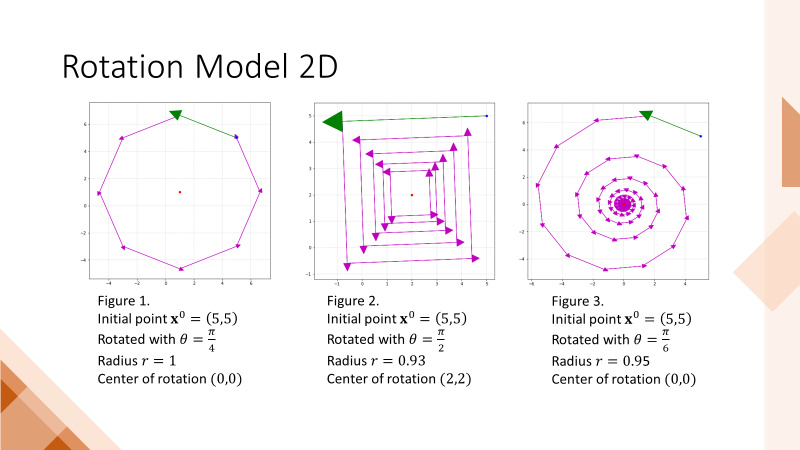

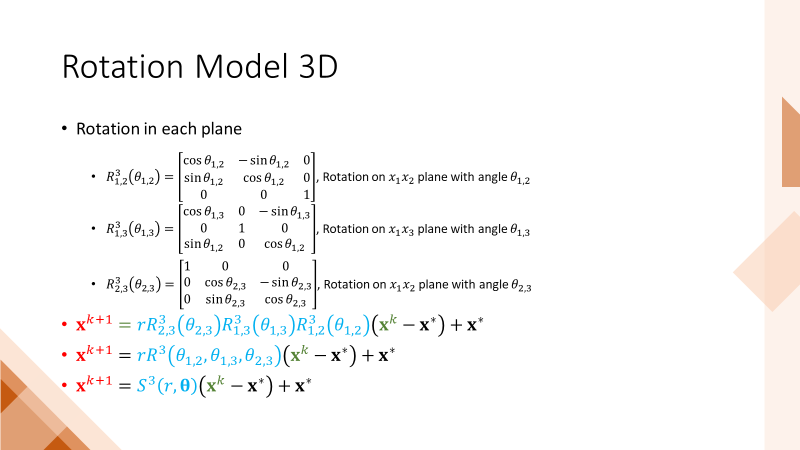

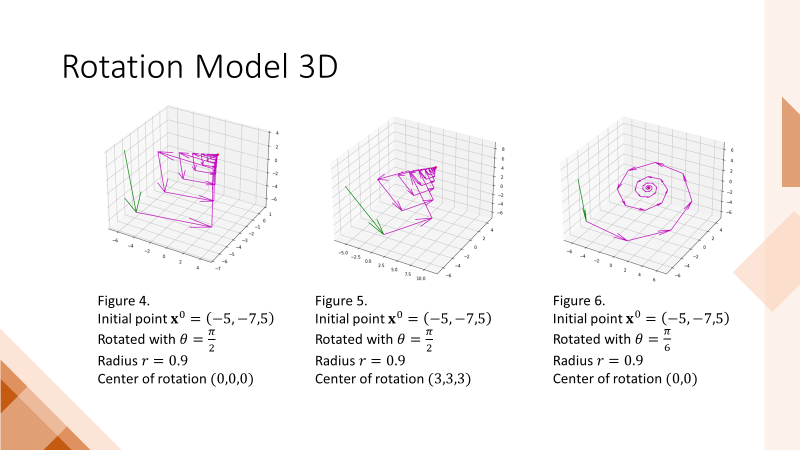

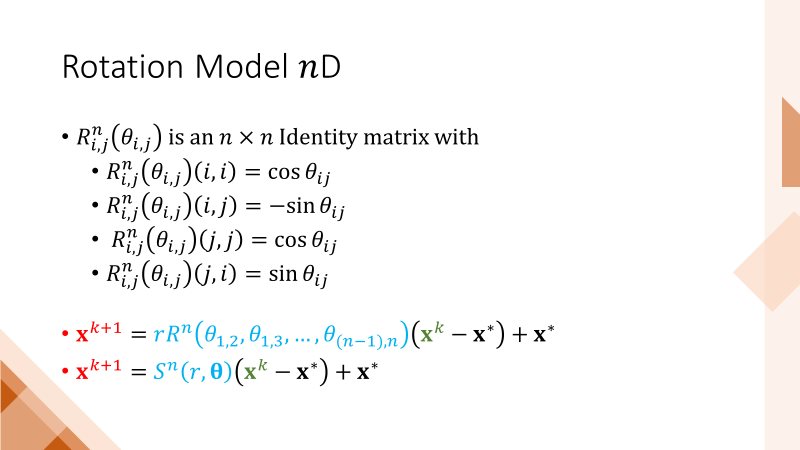

### Ilustration

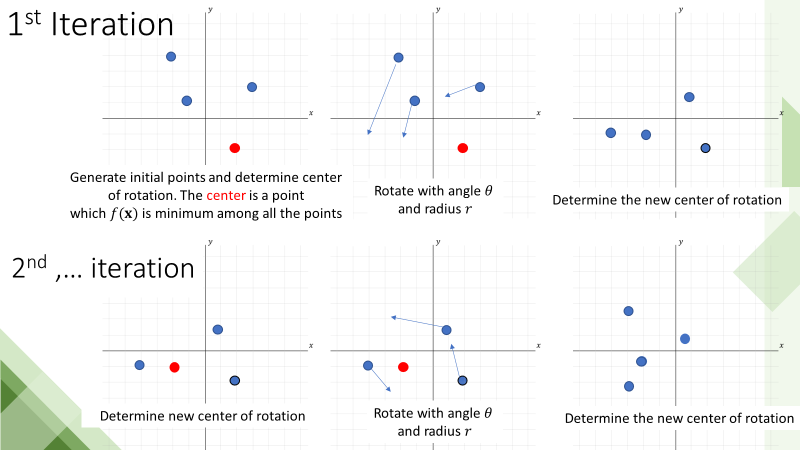

In [1]:
import math
import numpy as np
import copy
import random
import time
import datetime
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rotation Model

## Rotation 2D

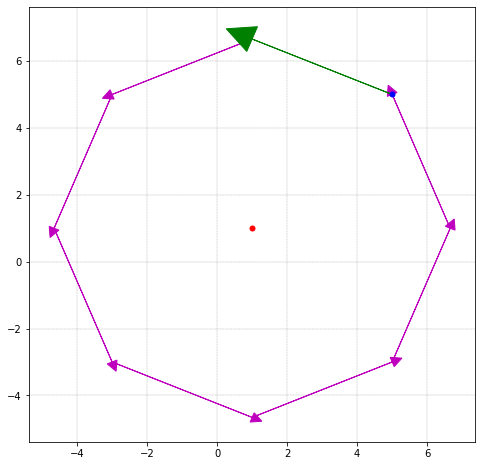

In [2]:
def x_rotate(x,radius=0.95,theta=math.pi/3):
    rotate_m=radius*np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]])
    return rotate_m@x
def xvec_rotate(xvec,center=[0,0],n=10,radius=0.95,theta=-math.pi/3):
    rotate_m=radius*np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]])
    for i in range(n):
        x_new=rotate_m@(xvec[-1]-np.array(center))+np.array(center)
        xvec.append(x_new)
    return xvec
def plot_spiral(x,center):   
    plt.rcParams["figure.figsize"] = (8,8)
    ax = plt.axes()
    plt.grid(color='grey', linestyle='--', linewidth=0.3)
    for i in range(1,len(x)-1):
        ax.arrow( x[i][0],x[i][1], (x[i+1][0]-x[i][0]),(x[i+1][1]-x[i][1]), color='m' , head_width=0.3, head_length=0.3)
    i=0 ; ax.arrow( x[i][0],x[i][1], (x[i+1][0]-x[i][0]),(x[i+1][1]-x[i][1]) ,color='g', head_width=0.8, head_length=0.8)
    plt.plot(x[0][0], x[0][1], marker="o", markersize=5, markeredgecolor="b", markerfacecolor="b")
    plt.plot(center[0], center[1], marker="o", markersize=5, markeredgecolor="r", markerfacecolor="r")    
    plt.show()
x=[np.array([5,5])] ; center=[1,1]
x_all=xvec_rotate(x,center,n=8,radius=1,theta=math.pi/4)
plot_spiral(x_all,center)

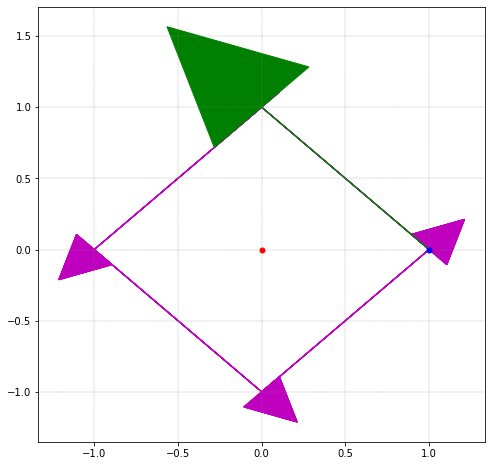

In [3]:
x=[np.array([1,0])] ; center=[0,0]
x_all=xvec_rotate(x,center,n=20,radius=1,theta=math.pi/2)
plot_spiral(x_all,center)

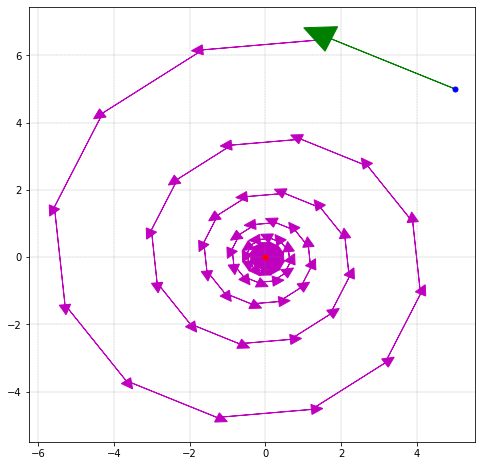

In [4]:
x=[np.array([5,5])] ; center=[0,0]
x_all=xvec_rotate(x,center,n=100,radius=0.95,theta=math.pi/6)
plot_spiral(x_all,center)

## Rotation 3D 

In [5]:
def x_rotate_nd(x,dim,theta_idx,center):
    rotate_m=np.eye(dim)
    theta=theta_idx[0][0]
    for ti in theta_idx:
        theta=ti[0] ; radius=ti[1] ; idx=ti[2]
        rotate_m=get_mrotate(dim,theta,idx)@rotate_m
    radius=theta_idx[0][1]
    x=radius*rotate_m@(x-center)+center
    return x
def get_mrotate(dim,theta,idx):
    temp=np.eye(dim)
    temp[idx[0]][idx[0]]=math.cos(theta)
    temp[idx[0]][idx[1]]=-math.sin(theta)
    temp[idx[1]][idx[0]]=math.sin(theta)
    temp[idx[1]][idx[1]]=math.cos(theta)
    return temp
def plot_spiral3d(x_all,center):   
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(1,len(x_all)-1):
        ax.quiver3D(x_all[i][0], x_all[i][1], x_all[i][2], (x_all[i+1][0]-x_all[i][0]), (x_all[i+1][1]-x_all[i][1]), (x_all[i+1][2]-x_all[i][2]), color='m')
    ax.quiver3D(x_all[0][0], x_all[0][1], x_all[0][2], (x_all[1][0]-x_all[0][0]), (x_all[1][1]-x_all[0][1]), (x_all[1][2]-x_all[0][2]), color='g')
    plt.plot(center[0],center[1],center[2], marker="o", markersize=5, markeredgecolor="r", markerfacecolor="r")
    plt.rcParams["figure.figsize"] = (8,8)
    plt.show()
def rotate_3d(x,center,m=1,dim=3,total_iter=20,theta=math.pi/4,radius = 0.95):
    theta_idx=[(theta,radius,p) for p in itertools.product([i for i in range(dim-1)],[j for j in range(1,dim)]) if p[1]>p[0]]
    x_all=[x]
    for iter in range(total_iter):
        x=x_rotate_nd(x,dim,theta_idx,center)
        x_all.append(x)
    plot_spiral3d(x_all,center)

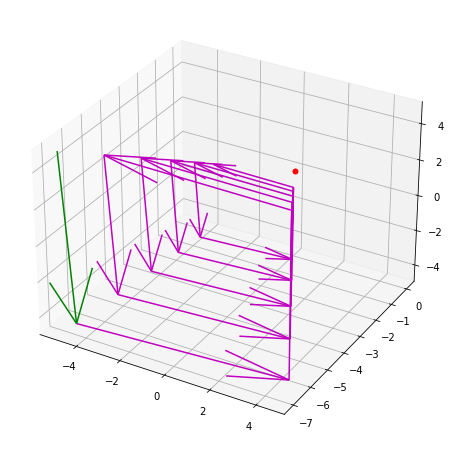

In [6]:
x=np.array([-5,-7,5]) ; center=np.array([0,0,0])
rotate_3d(x,center,m=1,dim=3,total_iter=20,theta=math.pi/2,radius = 0.95)

# Spiral Multi Point

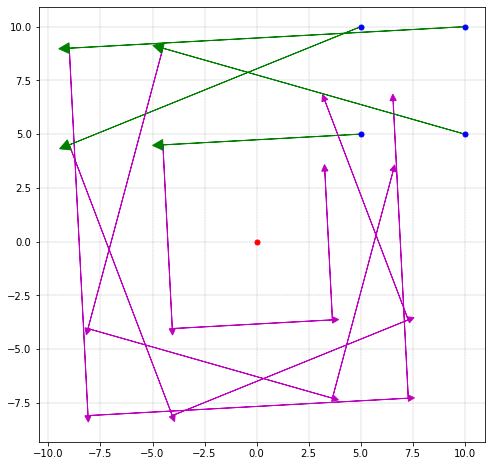

In [7]:
def xvec_rotate(xvec,center=[0,0],n=10,radius=0.95,theta=-math.pi/3):
    rotate_m=radius*np.array([[math.cos(theta),-math.sin(theta)],[math.sin(theta),math.cos(theta)]])
    for i in range(n):
        x_new=rotate_m@(xvec[-1]-np.array(center))+np.array(center)
        xvec.append(x_new)
    return xvec
def xvec_rotate_multi(x,center,n,radius,theta):
    xvec_m=copy.deepcopy(x)
    for i in range(len(x)):
        xvec_m[i]=xvec_rotate(x[i],center,n,radius,theta)
    return xvec_m
def plot_spiral_multi(x_multi,center):   
    plt.rcParams["figure.figsize"] = (8,8)
    ax = plt.axes()
    plt.grid(color='grey', linestyle='--', linewidth=0.3)
    for x in x_multi:
        for i in range(1,len(x)-1):
            ax.arrow( x[i][0],x[i][1], (x[i+1][0]-x[i][0]),(x[i+1][1]-x[i][1]), color='m' , head_width=0.3, head_length=0.3)
        i=0 ; ax.arrow( x[i][0],x[i][1], (x[i+1][0]-x[i][0]),(x[i+1][1]-x[i][1]) ,color='g', head_width=0.5, head_length=0.5)
        plt.plot(x[0][0], x[0][1], marker="o", markersize=5, markeredgecolor="b", markerfacecolor="b")
    plt.plot(center[0], center[1], marker="o", markersize=5, markeredgecolor="r", markerfacecolor="r")
    plt.show()
x=[[np.array([5,5])],[np.array([10,10])],[np.array([5,10])],[np.array([10,5])]]
center=[0,0]
x_multi=xvec_rotate_multi(x,center,n=4,radius=0.9,theta=math.pi/2)
plot_spiral_multi(x_multi,center)

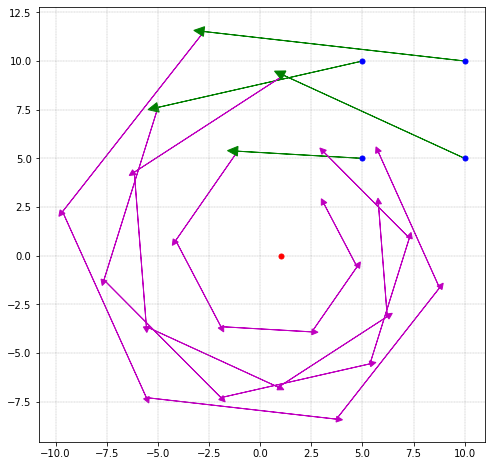

In [8]:
x=[[np.array([5,5])],[np.array([10,10])],[np.array([5,10])],[np.array([10,5])]]
center=[1,0]
x_multi=xvec_rotate_multi(x,center,n=6,radius=0.9,theta=math.pi/3)
plot_spiral_multi(x_multi,center)

# Spiral Dynamic Optimization Implementation

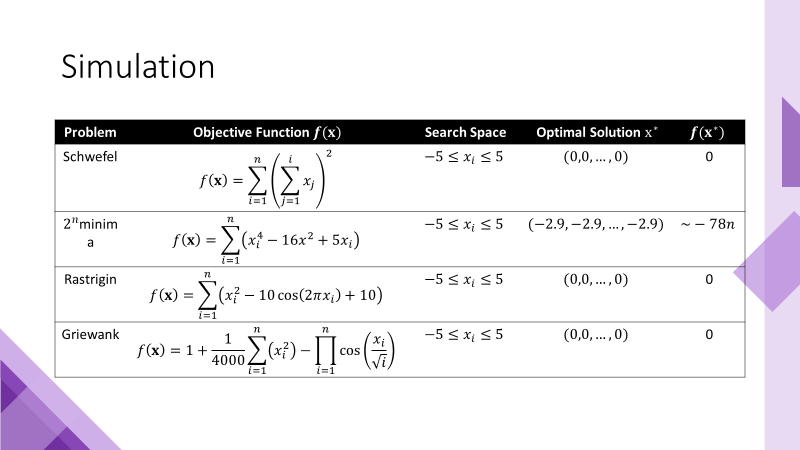

## Simulation 

In [9]:
def x_rotate(x,dim,theta_idx):
    center=find_center(x)
    rotate_m=np.eye(dim)
    for ti in theta_idx:
        theta=ti[0] ; radius=ti[1] ; idx=ti[2]
        rotate_m=rotate_m@get_mrotate(dim,theta,idx)
    for i in range(len(x)):
        x[i]=radius*rotate_m@x[i]-(radius*rotate_m-np.eye(dim))@center
    return x,center

def find_center(x):
    temp=[f(x[i]) for i in range(len(x))]
    return x[temp.index(min(temp))]

def get_mrotate(dim,theta,idx):
    temp=np.eye(dim)
    temp[idx[0]][idx[0]]=math.cos(theta)
    temp[idx[0]][idx[1]]=-math.sin(theta)
    temp[idx[1]][idx[0]]=math.sin(theta)
    temp[idx[1]][idx[1]]=math.cos(theta)
    return temp

In [10]:
def run_spiral(m=100,domain_x=[-5,5],dim=3,total_iter=100,expected_sol=0,theta=math.pi/4,radius = 0.95):
    tic=time.perf_counter()
    theta_idx=[(theta,radius,p) for p in itertools.product([i for i in range(dim-1)],[j for j in range(1,dim)]) if p[1]>p[0]]
    random.seed(100061984)
    x=[np.array([random.uniform(domain_x[0],domain_x[1]) for j in range(dim)]) for i in range(m)]
    for iter in range(total_iter):
        x,center=x_rotate(x,dim,theta_idx)
    print(str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S-")),f"-Running Time {time.perf_counter() - tic:0.4f}s")
    print('x=',center,', f(x)=',f(center),' ,expected f(x)~',expected_sol*dim,'\n')

### Schwefel

In [11]:
def f(x):
    sum=0
    for i in range(len(x)):
        sum2=0
        for j in range(i+1):
            sum2+=x[j]
        sum+=sum2**2
    return sum
m=20 ; dim=3 ; total_iter =1000 ; expected_sol=0 ; domain_x=[-5,5]
for theta,radius in [p for p in itertools.product([math.pi/4,math.pi/2],[0.95,0.99])]:
    print('Schwefel, with radius=',radius,', theta=',theta)
    run_spiral(m,domain_x,dim,total_iter,expected_sol,theta,radius)

Schwefel, with radius= 0.95 , theta= 0.7853981633974483
2022-10-07 04:54:40- -Running Time 0.7540s
x= [-5.70673352e-23  5.74059097e-23 -6.40619707e-24] , f(x)= 3.2936114181395556e-45  ,expected f(x)~ 0 

Schwefel, with radius= 0.99 , theta= 0.7853981633974483
2022-10-07 04:54:41- -Running Time 0.6766s
x= [ 2.31464909e-05 -4.48253440e-05  3.43371138e-05] , f(x)= 1.16596427706926e-09  ,expected f(x)~ 0 

Schwefel, with radius= 0.95 , theta= 1.5707963267948966
2022-10-07 04:54:41- -Running Time 0.6872s
x= [ 8.19036725e-23 -4.72625173e-23 -1.37269560e-23] , f(x)= 8.345624923092741e-45  ,expected f(x)~ 0 

Schwefel, with radius= 0.99 , theta= 1.5707963267948966
2022-10-07 04:54:42- -Running Time 0.6990s
x= [-9.30826107e-05  1.14193605e-04  4.10117569e-05] , f(x)= 1.2969282678095598e-08  ,expected f(x)~ 0 



### 2^n Minima

In [12]:
def f(x):
    sum=0
    for xx in x:
        sum+=xx**4-16*xx**2+5*xx
    return sum
m=20 ; dim=3 ; total_iter =1000 ; expected_sol=-78 ; domain_x=[-5,5]
for theta,radius in [p for p in itertools.product([math.pi/4,math.pi/2],[0.95,0.99])]:
    print('2^n minima, with radius=',radius,', theta=',theta)
    run_spiral(m,domain_x,dim,total_iter,expected_sol,theta,radius)

2^n minima, with radius= 0.95 , theta= 0.7853981633974483
2022-10-07 04:54:43- -Running Time 0.7607s
x= [-2.90353401 -2.90353403 -2.90353402] , f(x)= -234.99699422262853  ,expected f(x)~ -234 

2^n minima, with radius= 0.99 , theta= 0.7853981633974483
2022-10-07 04:54:44- -Running Time 0.7561s
x= [-2.90355863 -2.90357397 -2.90356478] , f(x)= -234.99699411381573  ,expected f(x)~ -234 

2^n minima, with radius= 0.95 , theta= 1.5707963267948966
2022-10-07 04:54:44- -Running Time 0.8027s
x= [ 2.74680276 -2.90353402 -2.90353403] , f(x)= -206.72355612565357  ,expected f(x)~ -234 

2^n minima, with radius= 0.99 , theta= 1.5707963267948966
2022-10-07 04:54:45- -Running Time 0.7410s
x= [ 2.74692177 -2.90351547 -2.90354859] , f(x)= -206.72355569193851  ,expected f(x)~ -234 



### Rastrigin

In [13]:
def f(x):
    sum=0
    for xx in x:
        sum+=xx**2-10*math.cos(2*math.pi*xx)+10
    return sum
m=20 ; dim=3 ; total_iter =1000 ; expected_sol=0 ; domain_x=[-5,5]
for theta,radius in [p for p in itertools.product([math.pi/4,math.pi/2],[0.95,0.99])]:
    print('Rastrigin, with radius=',radius,', theta=',theta)
    run_spiral(m,domain_x,dim,total_iter,expected_sol,theta,radius)

Rastrigin, with radius= 0.95 , theta= 0.7853981633974483
2022-10-07 04:54:46- -Running Time 0.7699s
x= [-0.99495863  0.99495864  0.99495864] , f(x)= 2.9848771712798747  ,expected f(x)~ 0 

Rastrigin, with radius= 0.99 , theta= 0.7853981633974483
2022-10-07 04:54:47- -Running Time 0.7178s
x= [9.94980938e-01 1.32970162e-05 3.71035429e-05] , f(x)= 0.9949594639021537  ,expected f(x)~ 0 

Rastrigin, with radius= 0.95 , theta= 1.5707963267948966
2022-10-07 04:54:47- -Running Time 0.7630s
x= [-9.94958638e-01  9.94958637e-01 -5.06837017e-10] , f(x)= 1.9899181141865796  ,expected f(x)~ 0 

Rastrigin, with radius= 0.99 , theta= 1.5707963267948966
2022-10-07 04:54:48- -Running Time 0.7215s
x= [ 0.99492168  0.99505982 -1.98992615] , f(x)= 5.969751644017701  ,expected f(x)~ 0 



### Griewank

In [14]:
def f(x):
    sum=0
    times=1 ; i=1
    for xx in x:
        times=times*math.cos(xx/math.sqrt(i)) ; i+=1
        sum+=xx**2
    return 1+sum/4000-times
m=20 ; dim=3 ; total_iter =1000 ; expected_sol=0 ; domain_x=[-5,5]
for theta,radius in [p for p in itertools.product([math.pi/4,math.pi/2],[0.95,0.99])]:
    print('Griewank, with radius=',radius,', theta=',theta)
    run_spiral(m,domain_x,dim,total_iter,expected_sol,theta,radius)

Griewank, with radius= 0.95 , theta= 0.7853981633974483
2022-10-07 04:54:49- -Running Time 0.7531s
x= [1.01259714e-08 1.07067731e-08 1.06987083e-08] , f(x)= 0.0  ,expected f(x)~ 0 

Griewank, with radius= 0.99 , theta= 0.7853981633974483
2022-10-07 04:54:50- -Running Time 0.7110s
x= [ 1.87340245e-05 -3.38705711e-05  4.22917814e-05] , f(x)= 7.612066532658446e-10  ,expected f(x)~ 0 

Griewank, with radius= 0.95 , theta= 1.5707963267948966
2022-10-07 04:54:50- -Running Time 0.7165s
x= [ 2.09355301e-09 -7.68909510e-09 -1.76942986e-08] , f(x)= 0.0  ,expected f(x)~ 0 

Griewank, with radius= 0.99 , theta= 1.5707963267948966
2022-10-07 04:54:51- -Running Time 0.7241s
x= [-6.27239769  8.87943974  0.01681836] , f(x)= 0.029662255922352165  ,expected f(x)~ 0 



## Multi Simulation With Different Initial Point

In [15]:
def run_spiral_woutseed(m=100,domain_x=[-5,5],dim=3,total_iter=100,expected_sol=0,theta=math.pi/4,radius = 0.95):
    tic=time.perf_counter()
    theta_idx=[(theta,radius,p) for p in itertools.product([i for i in range(dim-1)],[j for j in range(1,dim)]) if p[1]>p[0]]
    x=[np.array([random.uniform(domain_x[0],domain_x[1]) for j in range(dim)]) for i in range(m)]
    for iter in range(total_iter):
        x,center=x_rotate(x,dim,theta_idx)
    #print(str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S-")),f"-Running Time {time.perf_counter() - tic:0.4f}s")
    #print('x=',center,', f(x)=',f(center),' ,expected f(x)~',expected_sol*dim,'\n')
    return center,f(center)

### Schwefel

In [16]:
def f(x):
    sum=0
    for i in range(len(x)):
        sum2=0
        for j in range(i+1):
            sum2+=x[j]
        sum+=sum2**2
    return sum
m=20 ; dim=3 ; total_iter =1000 ; expected_sol=0 ; domain_x=[-5,5]
for theta,radius in [p for p in itertools.product([math.pi/4,math.pi/2],[0.95,0.99])]:
    print('Schwefel, with radius=',radius,', theta=',theta)
    xstar=x[0]
    fstar=9999
    for find in range(100):
        center,fcenter=run_spiral_woutseed(m,domain_x,dim,total_iter,expected_sol,theta,radius)
        if fcenter<fstar:
            xstar=center; fstar=fcenter
    print('Best : center=',xstar,', f=',fstar,'\n')

Schwefel, with radius= 0.95 , theta= 0.7853981633974483
Best : center= [ 2.20160132e-24  1.49237295e-23 -3.71985896e-23] , f= 7.010597242630525e-46 

Schwefel, with radius= 0.99 , theta= 0.7853981633974483
Best : center= [-3.42434918e-06 -1.43707472e-06  1.02458620e-05] , f= 6.435178310049663e-11 

Schwefel, with radius= 0.95 , theta= 1.5707963267948966
Best : center= [ 4.95870392e-23 -4.80557472e-23  5.96990359e-23] , f= 6.210372362854691e-45 

Schwefel, with radius= 0.99 , theta= 1.5707963267948966
Best : center= [ 3.94847567e-05 -6.03101325e-05 -1.10888407e-05] , f= 3.0112595080836313e-09 



### 2^n Minima

In [17]:
def f(x):
    sum=0
    for xx in x:
        sum+=xx**4-16*xx**2+5*xx
    return sum
m=20 ; dim=3 ; total_iter =1000 ; expected_sol=-78 ; domain_x=[-5,5]
for theta,radius in [p for p in itertools.product([math.pi/4,math.pi/2],[0.95,0.99])]:
    print('2^n minima, with radius=',radius,', theta=',theta)
    xstar=x[0]
    fstar=9999
    for find in range(100):
        center,fcenter=run_spiral_woutseed(m,domain_x,dim,total_iter,expected_sol,theta,radius)
        if fcenter<fstar:
            xstar=center; fstar=fcenter
    print('Best : center=',xstar,', f=',fstar,'\n')

2^n minima, with radius= 0.95 , theta= 0.7853981633974483
Best : center= [-2.90353401 -2.90353403 -2.90353403] , f= -234.99699422262856 

2^n minima, with radius= 0.99 , theta= 0.7853981633974483
Best : center= [-2.90351577 -2.90353652 -2.90351765] , f= -234.9969942016082 

2^n minima, with radius= 0.95 , theta= 1.5707963267948966
Best : center= [-2.90353403 -2.90353405 -2.90353403] , f= -234.99699422262856 

2^n minima, with radius= 0.99 , theta= 1.5707963267948966
Best : center= [-2.90358313 -2.90354015 -2.90352224] , f= -234.9969941331576 



### Rastrigin

In [18]:
def f(x):
    sum=0
    for xx in x:
        sum+=xx**2-10*math.cos(2*math.pi*xx)+10
    return sum
m=20 ; dim=3 ; total_iter =1000 ; expected_sol=0 ; domain_x=[-5,5]
for theta,radius in [p for p in itertools.product([math.pi/4,math.pi/2],[0.95,0.99])]:
    print('Rastrigin, with radius=',radius,', theta=',theta)
    xstar=x[0]
    fstar=9999
    for find in range(100):
        center,fcenter=run_spiral_woutseed(m,domain_x,dim,total_iter,expected_sol,theta,radius)
        if fcenter<fstar:
            xstar=center; fstar=fcenter
    print('Best : center=',xstar,', f=',fstar,'\n')

Rastrigin, with radius= 0.95 , theta= 0.7853981633974483
Best : center= [-8.19106745e-10  1.22557182e-09  9.86003734e-10] , f= 0.0 

Rastrigin, with radius= 0.99 , theta= 0.7853981633974483
Best : center= [-3.68793203e-05 -2.96557046e-06 -1.22029000e-05] , f= 3.0111745275007706e-07 

Rastrigin, with radius= 0.95 , theta= 1.5707963267948966
Best : center= [ 1.45015186e-09 -1.67147212e-09  6.30473755e-10] , f= 0.0 

Rastrigin, with radius= 0.99 , theta= 1.5707963267948966
Best : center= [-2.81777978e-06  1.39472682e-05  4.96941207e-05] , f= 5.300980614464379e-07 



### Griewank

In [19]:
def f(x):
    sum=0
    times=1 ; i=1
    for xx in x:
        times=times*math.cos(xx/math.sqrt(i)) ; i+=1
        sum+=xx**2
    return 1+sum/4000-times
m=20 ; dim=3 ; total_iter =1000 ; expected_sol=0 ; domain_x=[-5,5]
for theta,radius in [p for p in itertools.product([math.pi/4,math.pi/2],[0.95,0.99])]:
    print('Griewank, with radius=',radius,', theta=',theta)
    xstar=x[0]
    fstar=9999
    for find in range(100):
        center,fcenter=run_spiral_woutseed(m,domain_x,dim,total_iter,expected_sol,theta,radius)
        if fcenter<fstar:
            xstar=center; fstar=fcenter
    print('Best : center=',xstar,', f=',fstar,'\n')

Griewank, with radius= 0.95 , theta= 0.7853981633974483
Best : center= [-7.47466325e-09  5.50292267e-09 -1.61390314e-08] , f= 0.0 

Griewank, with radius= 0.99 , theta= 0.7853981633974483
Best : center= [-1.56801447e-05  1.01575571e-05 -4.16578550e-05] , f= 4.384781426836071e-10 

Griewank, with radius= 0.95 , theta= 1.5707963267948966
Best : center= [-8.68748280e-09  5.57321480e-10 -1.77028044e-08] , f= 0.0 

Griewank, with radius= 0.99 , theta= 1.5707963267948966
Best : center= [ 9.32989996e-06 -8.20961602e-06  4.39311641e-05] , f= 3.825518790634419e-10 



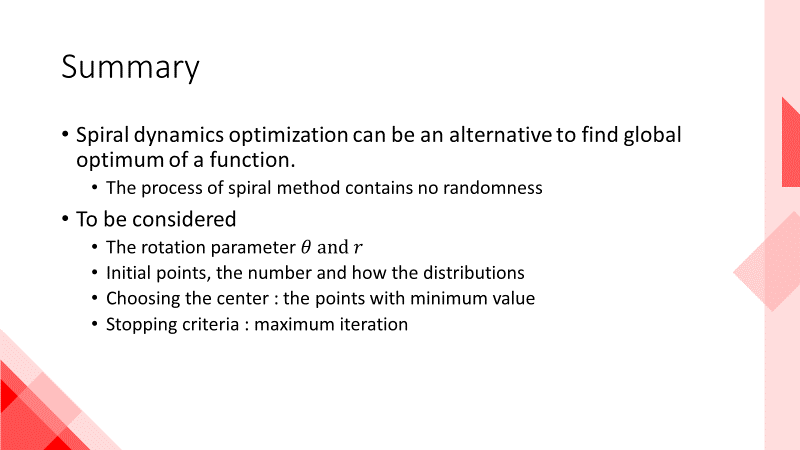

ridwanreza.com
> If there are any mistake please let me know

Thank you very much